In [1]:
# from PIL import Image
# from osgeo import gdal,ogr, osr
%config Completer.use_jedi = False
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer

import os


from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import re
import pickle
from os import listdir
from os.path import isfile, join
import time

In [2]:
# Read cultivated data make a train test split and read non-cultivated test on it
cultivated_path = "/raid/Praveen_Stuff/Madison/CSV/cultivated_2013.csv"
# non_cultivated_path = "/raid/Praveen_Stuff/Madison/CSV/non_cultivated_2013.csv"
cultivated_df = pd.read_csv(cultivated_path, memory_map=True)
# non_cultivated_df = pd.read_csv(non_cultivated_path)

In [4]:
# Cultivated X and Y
cultivated_X = cultivated_df.drop(columns=['longitude','latitude',"Unnamed: 0.1", "Unnamed: 0", 'label']).to_numpy()
cultivated_Y = cultivated_df['label'].to_numpy()
print(cultivated_X.shape)

(10057504, 28)


In [5]:
(unique_2, counts_2) = np.unique(cultivated_Y, return_counts=True)
print(unique_2, counts_2)

[0. 1.] [9622927  434577]


In [6]:
non_cultivated_path = "/raid/Praveen_Stuff/Madison/CSV/non_cultivated_2013.csv"
non_cultivated_df = pd.read_csv(non_cultivated_path, memory_map=True)

In [7]:
# Cultivated X and Y
non_cultivated_X = non_cultivated_df.drop(columns=['longitude','latitude',"Unnamed: 0.1", "Unnamed: 0", 'label']).to_numpy()
non_cultivated_Y = non_cultivated_df['label'].to_numpy()
print(non_cultivated_X.shape)

(158665571, 28)


In [ ]:
(unique_2, counts_2) = np.unique(non_cultivated_Y, return_counts=True)
print(unique_2, counts_2)

In [10]:
# filename = '/raid/Praveen_Stuff/Madison/Cultivated_models_reults/Normalizer_2013.sav'
# # # pickle.dump(transformer, open(filename, 'wb'))
# loaded_transformer = pickle.load(open(filename, 'rb'))

In [7]:
# transformer = Normalizer().fit(cultivated_X)
# transformer = transformer.fit(non_cultivated_X)
# complete_X = loaded_transformer.fit(complete_X)

In [14]:
# cultivated_X = transformer.transform(cultivated_X)
# non_cultivated_X = transformer.transform(non_cultivated_X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                      cultivated_X, cultivated_Y, random_state=42, test_size=0.3)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
(unique_2, counts_2) = np.unique(y_train, return_counts=True)    
print(unique_2, counts_2)
(unique_2, counts_2) = np.unique(y_test, return_counts=True)    
print(unique_2, counts_2)

(7040252, 28)
(3017252, 28)
(7040252,)
(3017252,)
[0. 1.] [6735313  304939]
[0. 1.] [2887614  129638]


In [10]:
oversampler = SMOTE()
# undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [11]:
model = RandomForestClassifier(n_estimators=20, criterion = 'entropy', random_state = 42)

In [12]:
model.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [ ]:
predict_train_y = model.predict(X_resampled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_resampled, predict_train_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_resampled, predict_train_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_resampled, predict_train_y)))
print(classification_report(y_resampled,predict_train_y))
print("Accuracy: ",accuracy_score(y_resampled, predict_train_y))
cm = confusion_matrix(y_resampled,predict_train_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1.0, 0.0])
disp.plot()

Mean Absolute Error: 0.00045680183038902583
Mean Squared Error: 0.00045680183038902583
Root Mean Squared Error: 0.021372922832149695
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   6735313
         1.0       1.00      0.99      0.99    304939

    accuracy                           1.00   7040252
   macro avg       1.00      1.00      1.00   7040252
weighted avg       1.00      1.00      1.00   7040252

0.999543198169611


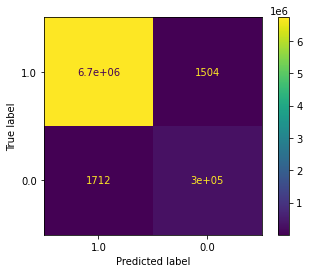

In [13]:
predict_train_y = model.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predict_train_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predict_train_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predict_train_y)))
print(classification_report(y_train,predict_train_y))
print(accuracy_score(y_train, predict_train_y))
cm = confusion_matrix(y_train,predict_train_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1.0, 0.0])
disp.plot()

Mean Absolute Error: 0.005917967740182126
Mean Squared Error: 0.005917967740182126
Root Mean Squared Error: 0.07692832859345201
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2887614
         1.0       0.93      0.93      0.93    129638

    accuracy                           0.99   3017252
   macro avg       0.97      0.96      0.96   3017252
weighted avg       0.99      0.99      0.99   3017252

0.9940820322598178


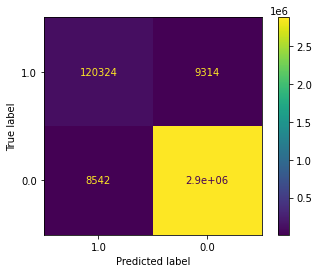

In [14]:
predict_test_y = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_test_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_test_y)))
print(classification_report(y_test,predict_test_y))
print(accuracy_score(y_test, predict_test_y))
cm = confusion_matrix(y_test, predict_test_y, labels = [1.0, 0.0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1.0, 0.0])
disp.plot()

Mean Absolute Error: 0.0002863129014926622
Mean Squared Error: 0.0002863129014926622
Root Mean Squared Error: 0.01692078312291314
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00 158607636
         1.0       0.64      0.50      0.56     57935

    accuracy                           1.00 158665571
   macro avg       0.82      0.75      0.78 158665571
weighted avg       1.00      1.00      1.00 158665571

0.9997136870985074


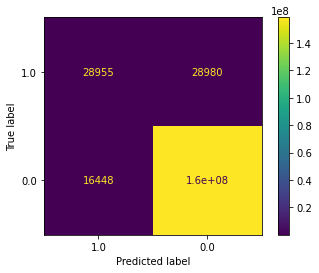

In [15]:
predict_test_y = model.predict(non_cultivated_X)
print('Mean Absolute Error:', metrics.mean_absolute_error(non_cultivated_Y, predict_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(non_cultivated_Y, predict_test_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(non_cultivated_Y, predict_test_y)))
print(classification_report(non_cultivated_Y,predict_test_y))
print(accuracy_score(non_cultivated_Y, predict_test_y))
cm = confusion_matrix(non_cultivated_Y, predict_test_y, labels = [1.0, 0.0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1.0, 0.0])
disp.plot()

In [4]:
# Save the model
filename = '/raid/Praveen_Stuff/Madison/Cultivated_models_reults/model_2013_70_Smote.sav'
# pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Load Complete data of different year for example 2015 or 2017
complete_path = "/raid/Praveen_Stuff/Madison/CSV/Complete_2015.csv"
complete_df = pd.read_csv(complete_path, memory_map=True)

In [ ]:
# Cultivated X and Y
complete_X = complete_df.drop(columns=['longitude','latitude',"cultivated", "Unnamed: 0", 'label']).to_numpy()
complete_Y = complete_df['label'].to_numpy()

Mean Absolute Error: 0.0041092780287190775
Mean Squared Error: 0.0041092780287190775
Root Mean Squared Error: 0.06410365066608202
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00 172047441
         1.0       0.46      0.03      0.05    706993

    accuracy                           1.00 172754434
   macro avg       0.73      0.51      0.52 172754434
weighted avg       0.99      1.00      0.99 172754434

0.9958907219712809


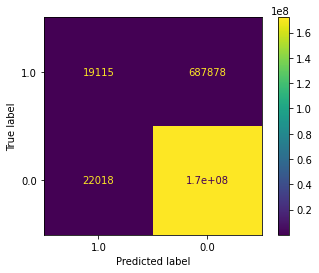

In [5]:
predict_test_y = loaded_model.predict(complete_X)
print('Mean Absolute Error:', metrics.mean_absolute_error(complete_Y, predict_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(complete_Y, predict_test_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(complete_Y, predict_test_y)))
print(classification_report(complete_Y,predict_test_y))
print(accuracy_score(complete_Y, predict_test_y))
cm = confusion_matrix(complete_Y, predict_test_y, labels = [1.0, 0.0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1.0, 0.0])
disp.plot()

In [8]:
prediction_complete_2015_df = complete_df[['longitude','latitude']]
prediction_complete_2015_df['Labels'] = predict_test_y
# Select only where the labels are 1 as they represent irrigated
new_df = prediction_complete_2015_df[prediction_complete_2015_df['Labels']==1.0]
print(new_df.head)

/home/CS/pvp0001/.conda/envs/Praveen/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
new_df.to_csv("/raid/Praveen_Stuff/Madison/Cultivated_models_reults/prediction_complete_2015_model2013.csv") 